<center>
    <h1> 
        Teste de Hipótese 1.10: Análise dos Histogramas RGB Após o Borramento das Imagens
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

<p>O borramento de imagens, seja por média ou pelo filtro Gaussiano, faz com que haja sobreposição ou redução das cores em que minoria pelas cores que estão em maioria. Embora, visualmente, as imagens fiquem descaracterizadas, a nível de histograma dos canais de cores conseguimos, de certa forma, concentrar as informações da cores. Neste notebook iremos verificar o efeito do borramento juntamente com outras tecnicas de melhoramento de imagem.</p>

<h4>Desafio #1: Classificação de documentos (RG, CNH e CPF) </h4>

 - Contextualização: Inúmeras áreas de diferentes organizações (usualmente como parte de um processo de um backoffice) recepcionam documentos dos seus clientes para formação de kits de documentação. Tais kits são, por exemplo, compartilhados com outros stakeholders das empresas. Conforme pode-se pressupor, um desafio nesse cenário refere-se ao fato de que o cliente pode enviar documentos, porém sem necessariamente indicar a qual tipo se o documento se refere (RG, CNH ou CPF, por exemplo). Dessa forma, ao invés de demandar um trabalho manual para essa leitura e classificação dos documentos, podemos construir um modelo de aprendizado que tenha capacidade de ler um conjunto de documentos (em .jpg, por exemplo) e, subsequentemente, realizar a classificação em três tipos distintos: RG, CNH e CPF.
 - Dataset: Para esse desafio utilizaremos um dataset público de RG, CNH e CPF (incluindo as imagens). Este repositório apresenta o conjunto de dados denominado Brazilian Identity Document Dataset (BID Dataset), o primeiro conjunto de dados público de documentos de identificação brasileiros. <br>
Link do dataset: https://github.com/ricardobnjunior/Brazilian-Identity-Document-Dataset

<h4>Roteiro</h4>
Módulos utilizados <br>
1. Visualização da média dos histogramas com o efeito de borramento nas imagens <br>
2. Aplicando aumento de brilho e depois CLAHE antes do borramento  <br>
3. Aplicando CLAHE e depois aumento de brilho antes do borramento <br>
4. Aumentando a máscara da média <br>
5. Conclusão

##### Módulos utilizados

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

# 1. Visualização da média dos histogramas com o efeito de borramento nas imagens

In [22]:
# Função de plot para facilitar
def multiplot():
    n = len(medias.keys()) + len(medias2.keys())
    fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

    cont = 0
    ax.flatten()
    ax = ax.T.flatten()
    for i,doc in zip(range(0,n,2),documentos):
        ax[0+(i)].imshow(medias[doc]['matrix']); 
        ax[0+(i)].axis('off'); ax[0+(i)].set_title(doc + ' bom',fontsize=10)

        ax[n+(i)].plot(medias[doc]['hist'][0], color='red');
        ax[n*2+(i)].plot(medias[doc]['hist'][1], color='green')
        ax[n*3+(i)].plot(medias[doc]['hist'][2], color='blue')

        ax[0+(i+1)].imshow(medias2[doc]['matrix']); 
        ax[0+(i+1)].axis('off'); ax[0+(i+1)].set_title(doc + ' ruim',fontsize=10)

        ax[n+(i+1)].plot(medias2[doc]['hist'][0], color='red');
        ax[n*2+(i+1)].plot(medias2[doc]['hist'][1], color='green')
        ax[n*3+(i+1)].plot(medias2[doc]['hist'][2], color='blue')

    plt.show()

In [3]:
# Lista de nomes para facilitar o acesso as pastas e aos arquivos
documentos = ['cpf_frente','cpf_tras','rg_frente','rg_tras','cnh_frente','cnh_tras']

In [7]:
# Laço para repetir o processos anteriores de um vez para todos as amostras boas
ksize = (70,70) # >> Definindo a máscara do borramento
medias = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
docs_bons = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,20):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para RGB
        img_aux = cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2RGB)
        doc.append(cv2.blur(img_aux, ksize))  # >> Aplicando o borramento
        docs_bons.append(doc[i])
        
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Média dos histogramas
    sum_red = 0
    sum_green = 0
    sum_blue = 0
    
    for i in range(len(doc)):
        sum_red += doc[i][0]
        sum_green += doc[i][1]
        sum_blue += doc[i][2]
        
    sum_red = sum_red/len(doc)
    sum_green = sum_green/len(doc)
    sum_blue = sum_blue/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_red, sum_green, sum_blue]}

In [24]:
# Laço para repetir o processos anteriores de um vez para todas as amostras ruins
medias2 = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
docs_ruins = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,7):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para RGB
        img_aux = cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2RGB)
        doc.append(cv2.blur(img_aux, ksize))
        docs_ruins.append(doc[i])
         
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Média dos histogramas
    sum_red = 0
    sum_green = 0
    sum_blue = 0
    
    for i in range(len(doc)):
        sum_red += doc[i][0]
        sum_green += doc[i][1]
        sum_blue += doc[i][2]
        
    sum_red = sum_red/len(doc)
    sum_green = sum_green/len(doc)
    sum_blue = sum_blue/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias2[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_red, sum_green, sum_blue]}

### Média dos histogramas das imagens após o borramento

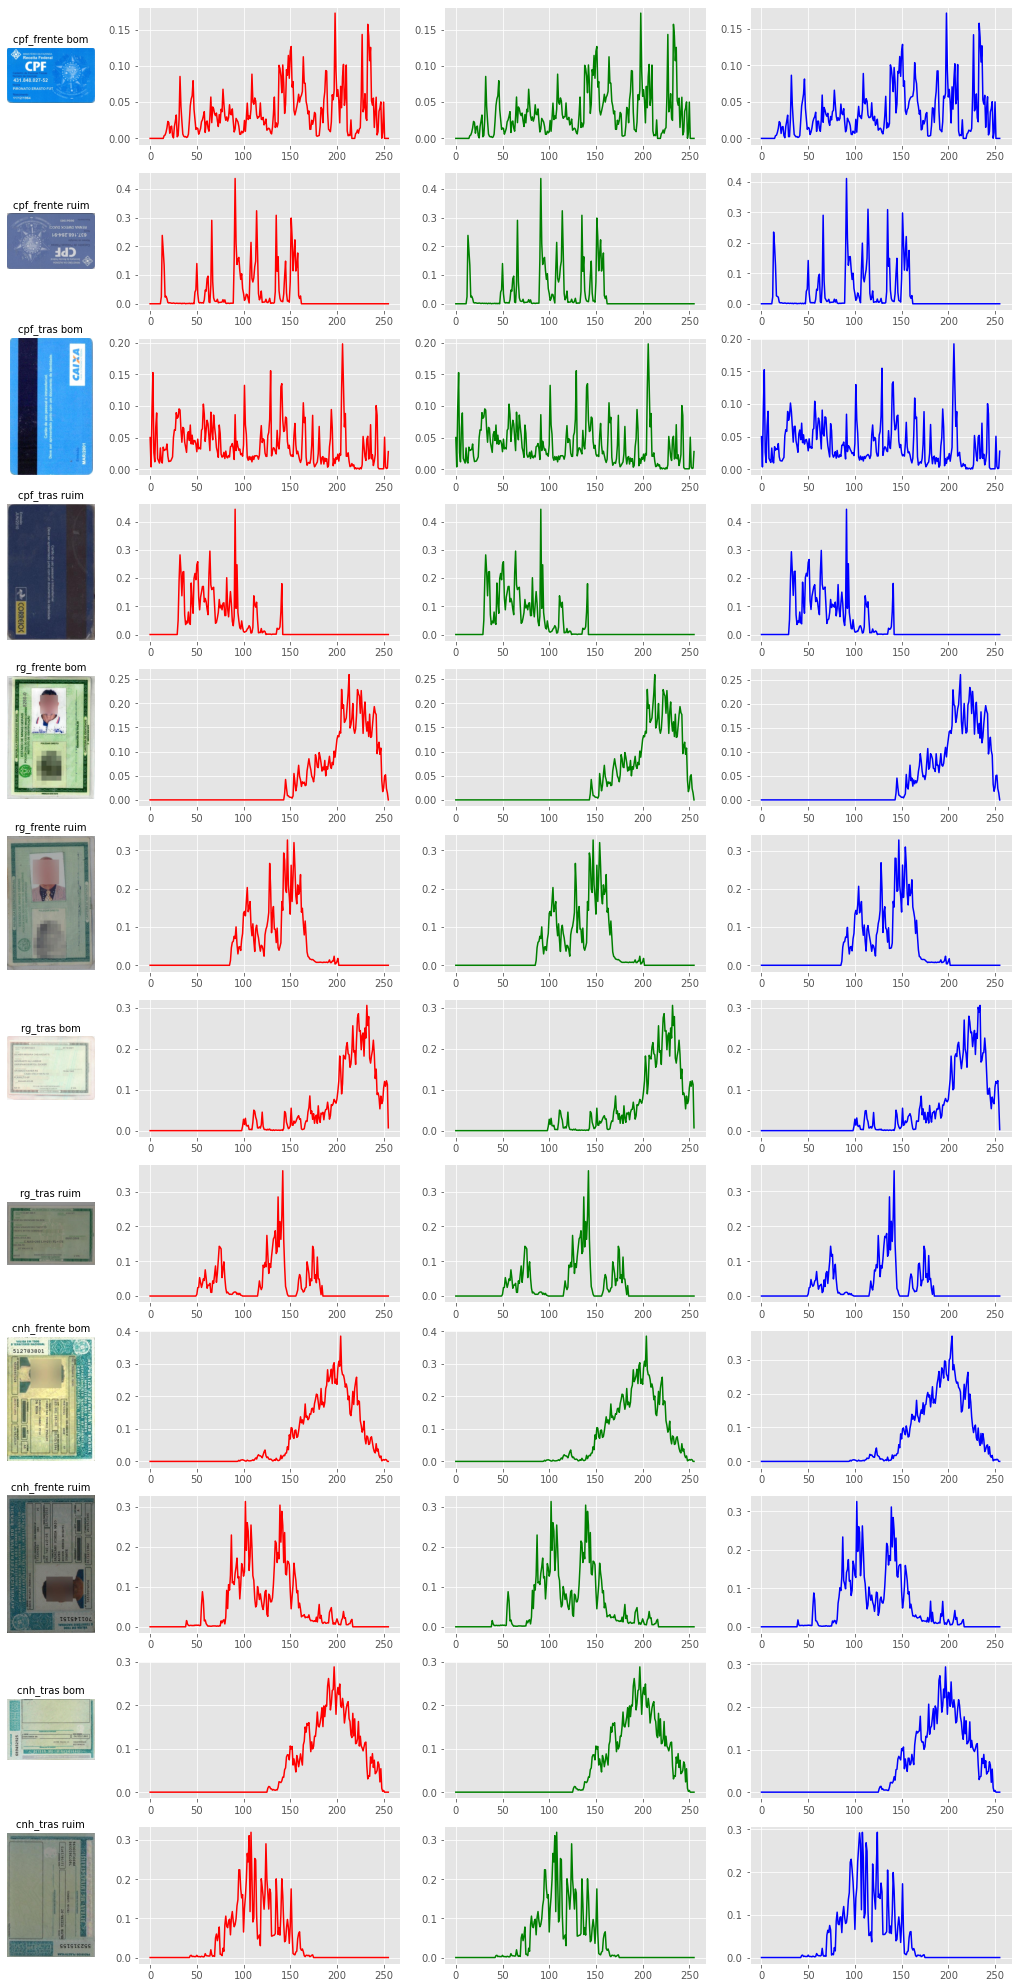

In [25]:
multiplot()

Podemos ver que houve um ajuste nas formas dos histogramas pois os valores RGB são modificados pela máscara das médias. Nesse ajuste, podemos ver que as formas de alguns histogramas das amostras ruins ficaram mais semelhantes às das amostras boas. Nesse caso, podemos experimentar outras técnicas já exploradas para melhorar a qualidade da imagem. 

# 2. Aplicando aumento de brilho e depois CLAHE antes do borramento

In [10]:
def clahe_func(img):
    r, g, b = cv2.split(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    red = clahe.apply(r)
    green = clahe.apply(g)
    blue = clahe.apply(b)
    return cv2.merge((red, green, blue))

In [11]:
def increase_brightness_percent(img, percent):
    r, g, b = cv2.split(img)
    return cv2.merge((r*(percent*1.002989), g*(percent*1.005870), b*(percent*1.001140))).astype('uint8')

In [20]:
# Laço para repetir o processos anteriores de um vez para todas as amostras ruins
medias2 = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
docs_ruins = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,7):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para RGB
        img_aux = cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2RGB)
        img_aux = increase_brightness_percent(img_aux, 1.45) # >> Aplicando o brilho percentual
        img_aux = clahe_func(img_aux) # >> Aplicando a equalização clahe
        doc.append(cv2.blur(img_aux, ksize))
        docs_ruins.append(doc[i])
         
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Média dos histogramas
    sum_red = 0
    sum_green = 0
    sum_blue = 0
    
    for i in range(len(doc)):
        sum_red += doc[i][0]
        sum_green += doc[i][1]
        sum_blue += doc[i][2]
        
    sum_red = sum_red/len(doc)
    sum_green = sum_green/len(doc)
    sum_blue = sum_blue/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias2[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_red, sum_green, sum_blue]}

### Média dos histogramas após aumento de brilho > equalização clahe > borramento

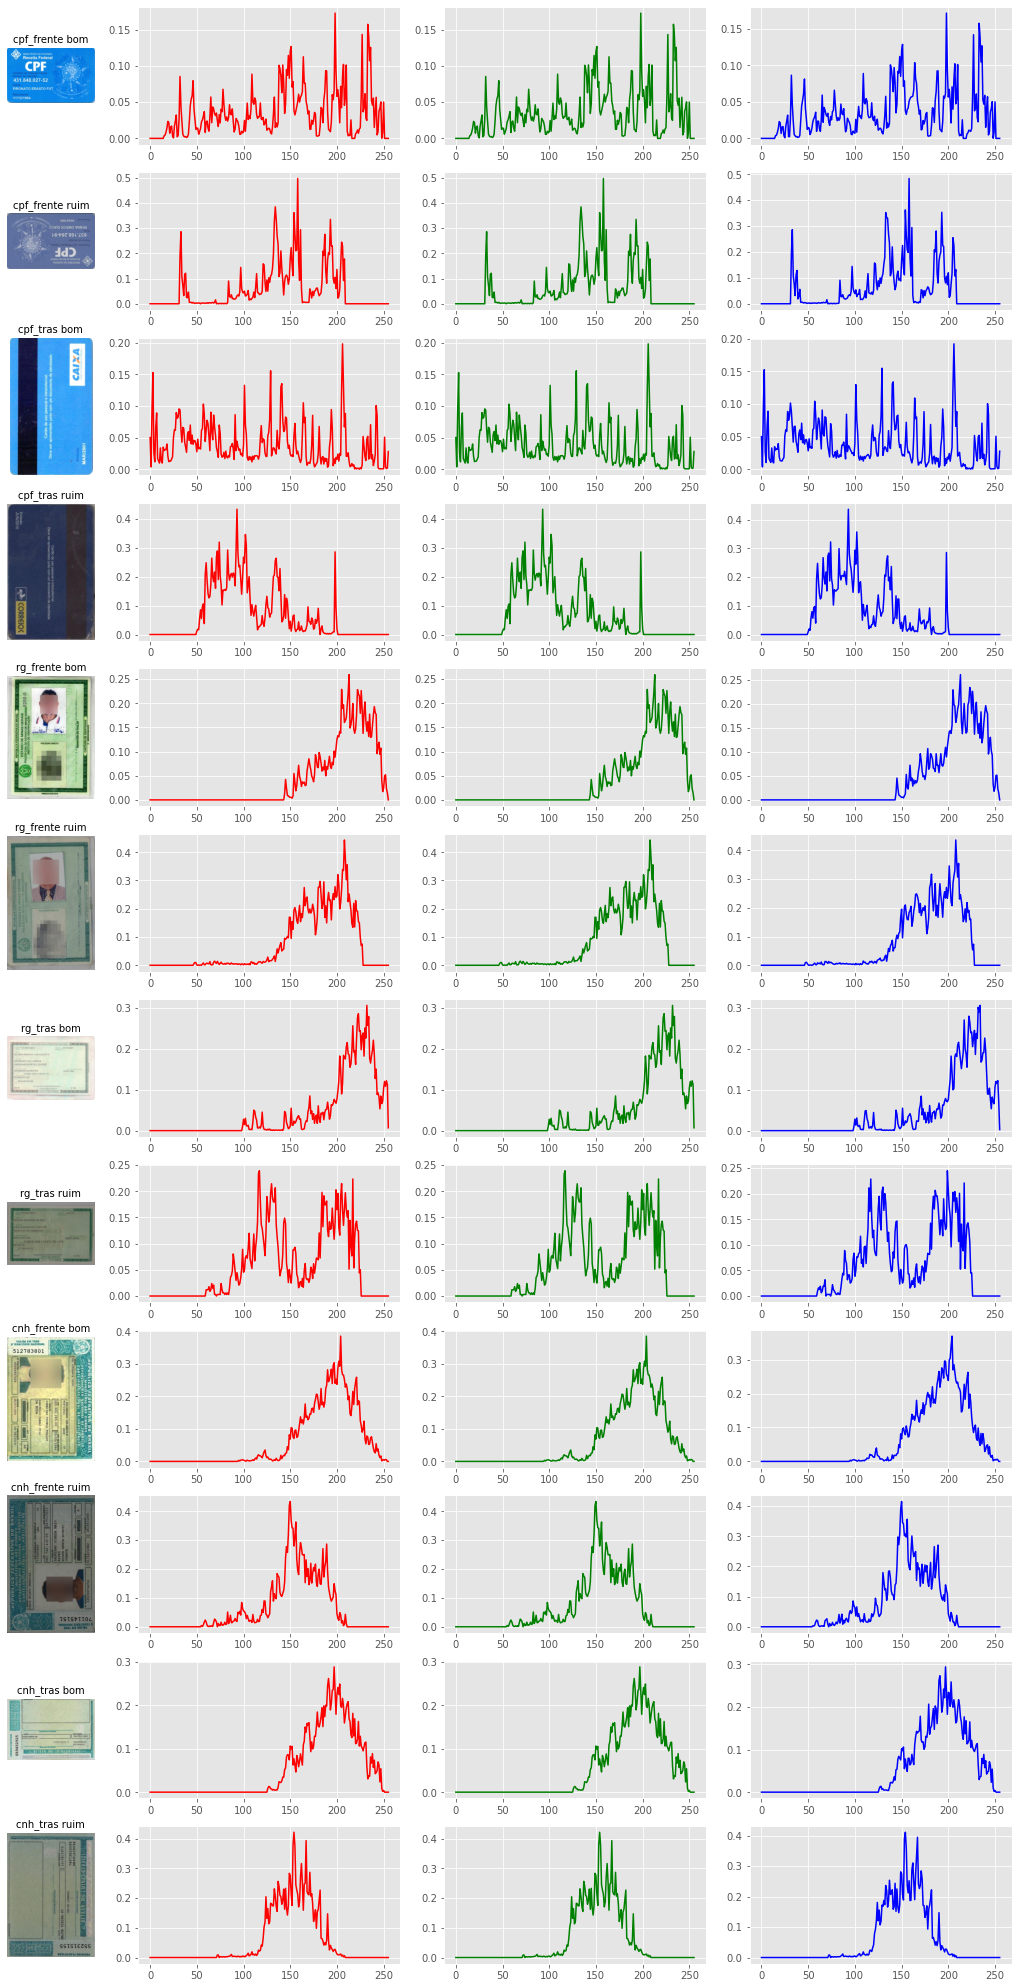

In [23]:
multiplot()

Podemos ver que o ajuste das imagens ruins ficou melhor do que somente com o borramento. 

# 3. Aplicando CLAHE e depois aumento de brilho antes do borramento

In [ ]:
# Laço para repetir o processos anteriores de um vez para todas as amostras ruins
medias2 = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
docs_ruins = [] # Lista para salvar as imagens para utiliza-las mais na frente
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,7):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para RGB
        img_aux = cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2RGB)
        img_aux = cv2.blur(img_aux, ksize)
        img_aux = increase_brightness_percent(img_aux, 1.4)
        doc.append(clahe_func(img_aux))
        docs_ruins.append(doc[i])
         
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Média dos histogramas
    sum_red = 0
    sum_green = 0
    sum_blue = 0
    
    for i in range(len(doc)):
        sum_red += doc[i][0]
        sum_green += doc[i][1]
        sum_blue += doc[i][2]
        
    sum_red = sum_red/len(doc)
    sum_green = sum_green/len(doc)
    sum_blue = sum_blue/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias2[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_red, sum_green, sum_blue]}

### Média dos histogramas após aumento de brilho > equalização clahe > borramento

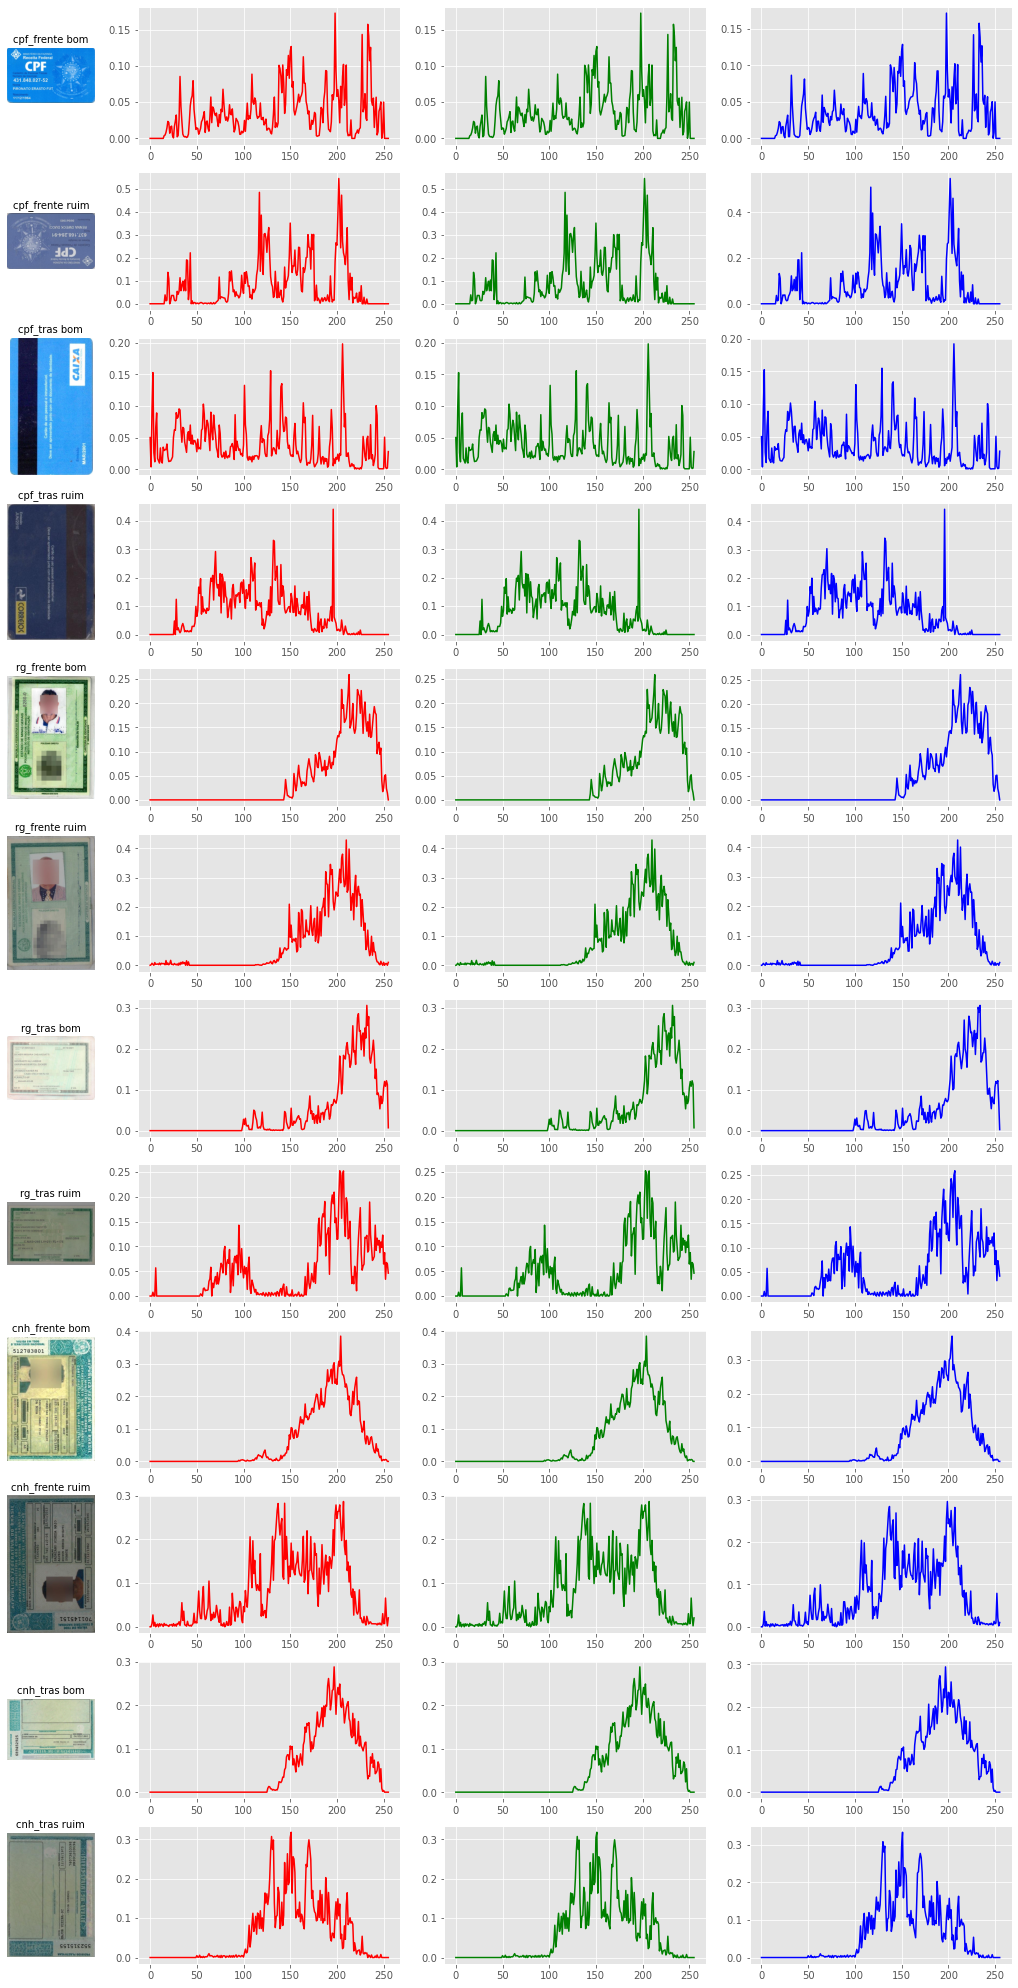

In [35]:
multiplot()

Podemos ver que o resultado não foi superior ou igual ao anterior.

# 4. Aumentando a máscara da média

In [42]:
# Laço para repetir o processos anteriores de um vez para todas as amostras ruins
medias2 = {}    # Dicionário para guardar todos as amostras dos documentos e as médias dos histogramas
docs_ruins = [] # Lista para salvar as imagens para utiliza-las mais na frente
ksize = (100,100)
for k in documentos:    # Laço iterando sobre a lista de nomes
    doc = []            # Lista para salvar os documentos
    for i in range(0,7):   # Laço para normalizar todos os histogramas do referido documento da vez
        hist = []     # Lista para salvar os histogramas
        # Abre e converte o sistema de cores para RGB
        img_aux = cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2RGB)
        img_aux = cv2.blur(img_aux, ksize)
        img_aux = increase_brightness_percent(img_aux, 1.4)
        doc.append(clahe_func(img_aux))
        docs_ruins.append(doc[i])
         
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processo análogo ao anterior para 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # cálcular as média dos histogramas
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Média dos histogramas
    sum_red = 0
    sum_green = 0
    sum_blue = 0
    
    for i in range(len(doc)):
        sum_red += doc[i][0]
        sum_green += doc[i][1]
        sum_blue += doc[i][2]
        
    sum_red = sum_red/len(doc)
    sum_green = sum_green/len(doc)
    sum_blue = sum_blue/len(doc)
    
    # Salva o resultado em um dicionário para facilitar nas plotagens
    medias2[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_ruins/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_red, sum_green, sum_blue]}

### Média dos histogramas para uma máscara de borramento maior

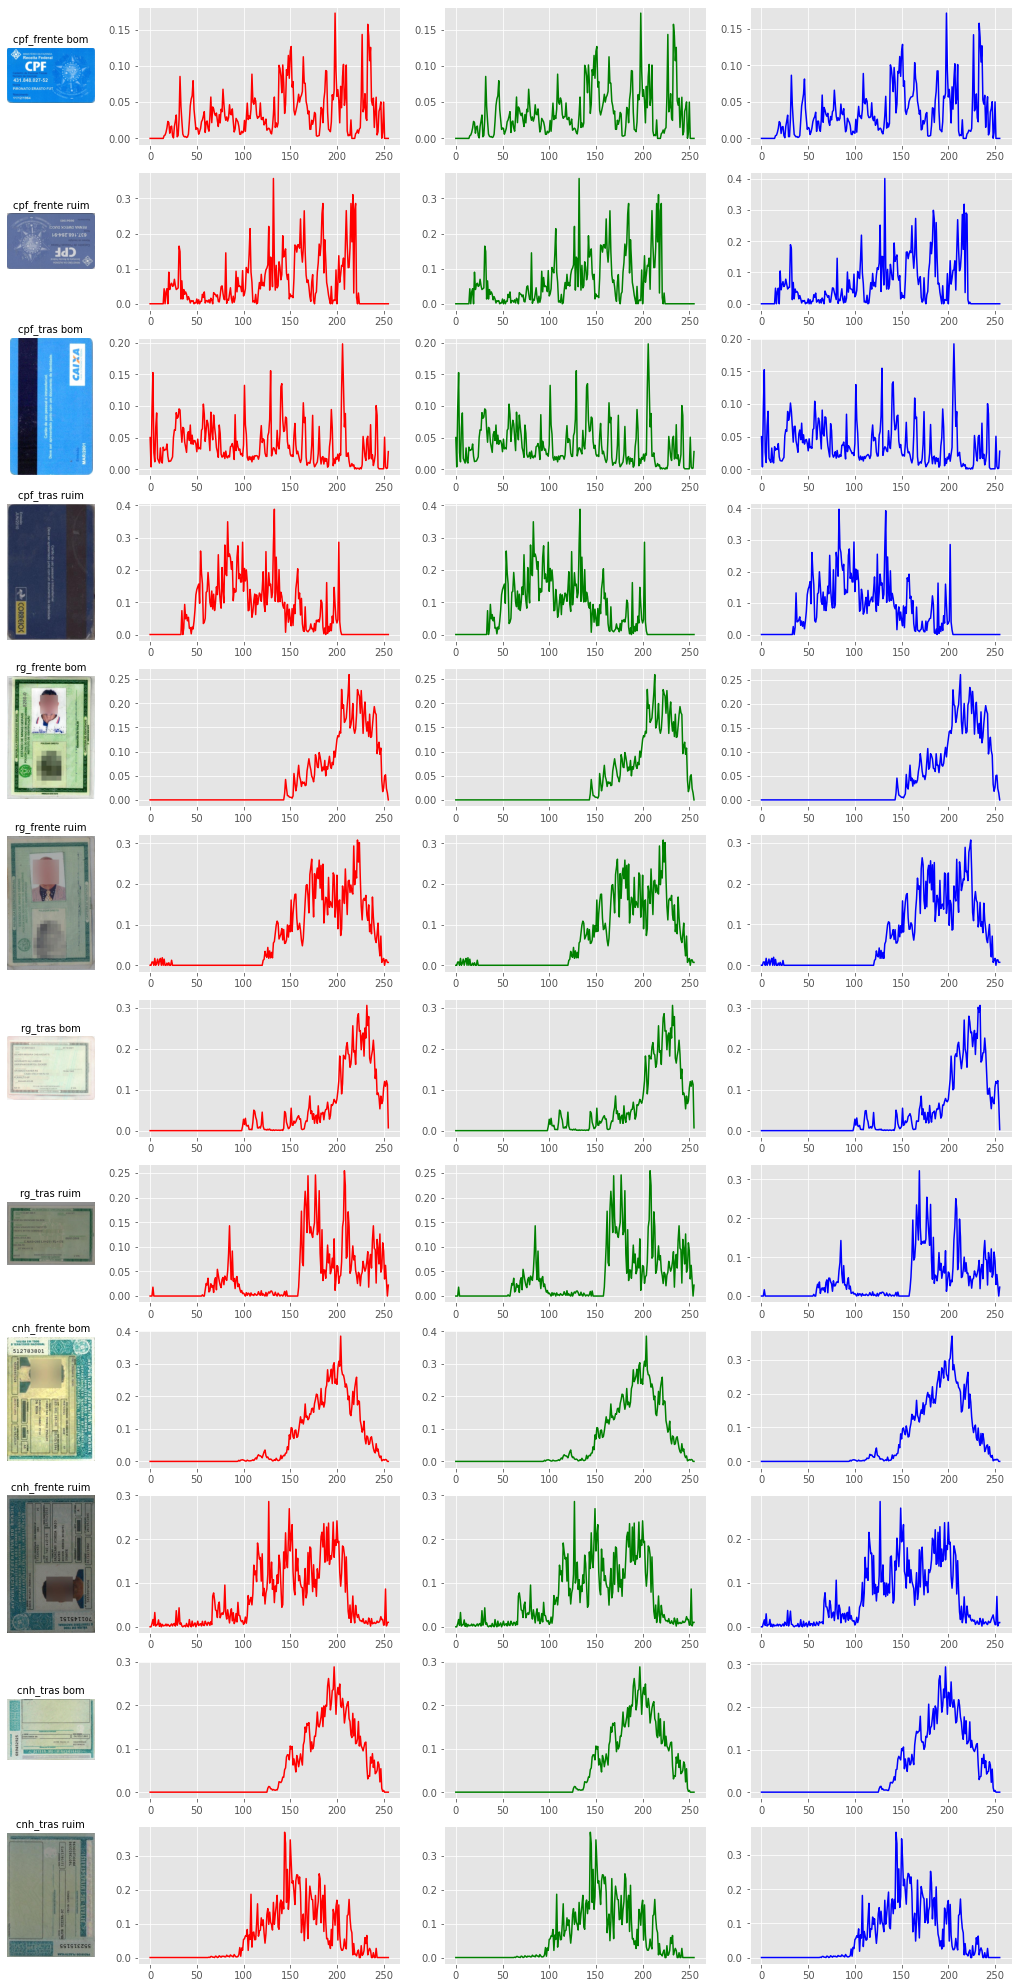

In [43]:
multiplot()

Podemos ver que ao, aplicarmos uma máscara maior de borramento, perdemos um poucos mais da caracterização da forma do histograma.

# 5. Conclusão

Nos testes anteiores, uma das minhas métricas para visualizar se alguma técnica de aprimoramento de brilho/contraste ficou bom era a própria imagem resultante, seguido do histograma. Entretanto, desse teste foi possível perceber que podemos adotar preprocessamento que desconfigurem as caracteristicas visuais das imagens em detrimento do realce de outras em seu histograma. Com esse teste consiguimos verificar uma técnica que apróxima mais ainda as amostras ruins das amostras boas, para que possamos viabilizar a classificação dos documentos através dos canais de cores.